              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             96.0            10.87   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.67             5.92              15.5  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             99.2            13.82   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.01            10.93              13.7  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             97.0            48.06   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.91            30.21               4.0  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             99.9            54.04   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             2.21            30.58               3.6  
    

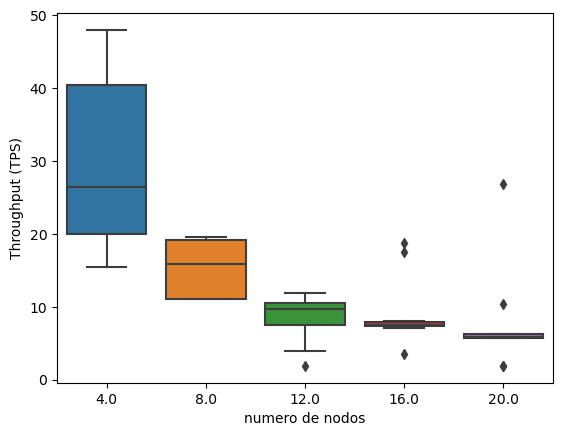

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_tables(url):
    # Read HTML tables into a list of DataFrame objects.
    tables = pd.read_html(url)

    for i, table in enumerate(tables):
        print(f"Table {i}")
        print(table)
        print("\n" * 2)
        
def extract_table(url, index):
    # lee la tabla selecionada
    #primero se extrae una lista con la tablas en formato dataframe
    tables = pd.read_html(url)
    #se esxrae la tabla indicando su indice
    table= tables[index]
    #retorna la tabla
    return table

def concatenar_tablas (ruta, numero_reportes):
    #se extrae la primera tabla de la ruta selecciona para determinar las columnas
    primera_tabla = extract_table((ruta+f'/report-1.html'),1)
    print(primera_tabla) 
    #se crea una tabla vacia con los nombres de las columnas
    tabla_concatenada = primera_tabla.iloc[0:0]  # Inicializar tabla_concatenada con las mismas columnas que primera_tabla
    for i in range(1, numero_reportes+1):
        #itera ñadiendo una fila por cada documento
        tabla = extract_table((ruta+f'/report-{i}.html'),1) 
        #añade informacion de la ronda a la tabla concatenada
        tabla['round'] = i
        tabla_concatenada = pd.concat([tabla_concatenada, tabla], ignore_index=True)
    #retorna la tabla con los datos de todas las rondas    
    return tabla_concatenada

def generar_tabla_comparativa_por_nodos (ruta, numero_reportes, n_muestras, tps_entrada, lista_n_nodos) :
    #esta funcion recibe como entrada la ruta de los reportes, el numero de reportes, el numero de muestras y la lista con
    #el numero de nodos.
    #la estructura de las carpetas debe seguir el siguiente ejemplo
    #-ruta/
    # --resultados-4-nodos/
    # ---100-tps-100-muestras                         -
    #--resultados-{n_nodos}-nodos/
    #---{tps_entrada}-tps-{n_muestras}-muestras
    
    # Generar tabla comparativa con las filas seleccionadas.
    tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])
    for n_nodos in lista_n_nodos:
        #genera la ruta al test con el numero de nodos y los tps indicados.
        ruta_final = ruta+'/resultados-'+n_nodos+f'-nodos/{tps_entrada}-tps-{n_muestras}-muestras'
        # Concatena las tablas
        tabla_concatenada = concatenar_tablas(ruta_final, numer_reportes)
        #Extrae los datos numericos de la tabla concatenada
        tablas_concatenada_numerica = tabla_concatenada.select_dtypes(include=['number'])
        #se extrae la suma de las columnas y el promedio a las series
        mean = tablas_numericas.mean()
        sum = tablas_numericas.sum()
        # Agregar una fila a la tabla comparativa con las estadísticas calculadas
        tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
    # retorna la tabla con los pormedios de todas los test para los diferentes numeros de nodos    
    return tabla_comparativa

def add_column_nodos(tabla, num_nodos):
    # Add a new column 'numero de nodos' with the specified number of nodes
    tabla['numero de nodos'] = num_nodos
    return tabla



# Concatenar las tablas
tablas_4_nodos_200_muestras = concatenar_tablas('reportes/resultados-4-nodos/200-tps-200-muestras', 10)
tablas_4_nodos_200_muestras = add_column_nodos(tablas_4_nodos_200_muestras, 4)
tablas_8_nodos_200_muestras = concatenar_tablas('reportes/resultados-8-nodos/200-tps-200-muestras', 10)
tablas_8_nodos_200_muestras = add_column_nodos(tablas_8_nodos_200_muestras, 8)
tablas_12_nodos_200_muestras = concatenar_tablas('reportes/resultados-12-nodos/100-tps-200-muestras', 10)
tablas_12_nodos_200_muestras = add_column_nodos(tablas_12_nodos_200_muestras, 12)
tablas_16_nodos_200_muestras = concatenar_tablas('reportes/resultados-16-nodos/200-tps-200-muestras', 10)
tablas_16_nodos_200_muestras = add_column_nodos(tablas_16_nodos_200_muestras, 16)
tablas_20_nodos_200_muestras = concatenar_tablas('reportes/resultados-20-nodos/200-tps-200-muestras', 10)
tablas_20_nodos_200_muestras = add_column_nodos(tablas_20_nodos_200_muestras, 20)
tablas_23_nodos_200_muestras = concatenar_tablas('reportes/resultados-23-nodos/200-tps-200-muestras', 10)
# Se concatenan las tablas
tablas = pd.concat([tablas_4_nodos_200_muestras, tablas_8_nodos_200_muestras, tablas_12_nodos_200_muestras, tablas_16_nodos_200_muestras, tablas_20_nodos_200_muestras, tablas_23_nodos_200_muestras], ignore_index=True)

print(tablas)
# Seleccionar solo las columnas numéricas
# tablas_numericas_4_nodos = tablas_4_nodos.select_dtypes(include=['number'])
# tablas_numericas_8_nodos = tablas_8_nodos.select_dtypes(include=['number'])

# Calcular la media y la suma de cada columna numérica
#mean_4_nodos = tablas_numericas.mean()
#suma_8_nodos = tablas_numericas.sum()

# Generar tabla comparativa
#tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])

# Agregar una fila a la tabla comparativa con las estadísticas calculadas
#tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
#print(tabla_comparativa)
#print("Tabla comparativa:")
#print(tablas)

# # Plot the data frame
# sns.barplot(x='round', y='Throughput (TPS)', data=tablas)
# plt.show()

# # Add a new plot
# sns.barplot(x='Succ', y='Succ', data=tablas)
# plt.show()

# Add a boxplot
sns.boxplot(x='numero de nodos', y='Throughput (TPS)', data=tablas)
plt.show()


# # Add a new plot
# sns.barplot(x='round', y='Send Rate (TPS)', data=tablas)
# plt.show()



              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   500     0            102.0            15.54   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             3.85            10.86              24.7  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   500     0            108.9            20.32   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.07            12.17              21.7  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   500     0            100.1            55.78   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             2.27             49.0               8.8  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   500     0            100.2            47.99   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.65            33.92               9.8  
    

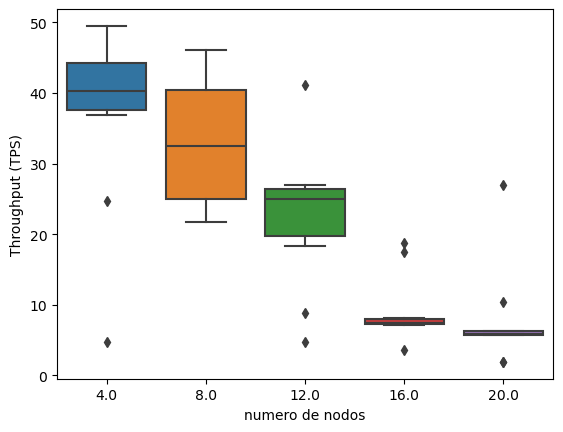

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_tables(url):
    # Read HTML tables into a list of DataFrame objects.
    tables = pd.read_html(url)

    for i, table in enumerate(tables):
        print(f"Table {i}")
        print(table)
        print("\n" * 2)
        
def extract_table(url, index):
    # lee la tabla selecionada
    #primero se extrae una lista con la tablas en formato dataframe
    tables = pd.read_html(url)
    #se esxrae la tabla indicando su indice
    table= tables[index]
    #retorna la tabla
    return table

def concatenar_tablas (ruta, numero_reportes):
    #se extrae la primera tabla de la ruta selecciona para determinar las columnas
    primera_tabla = extract_table((ruta+f'/report-1.html'),1)
    print(primera_tabla) 
    #se crea una tabla vacia con los nombres de las columnas
    tabla_concatenada = primera_tabla.iloc[0:0]  # Inicializar tabla_concatenada con las mismas columnas que primera_tabla
    for i in range(1, numero_reportes+1):
        #itera ñadiendo una fila por cada documento
        tabla = extract_table((ruta+f'/report-{i}.html'),1) 
        #añade informacion de la ronda a la tabla concatenada
        tabla['round'] = i
        tabla_concatenada = pd.concat([tabla_concatenada, tabla], ignore_index=True)
    #retorna la tabla con los datos de todas las rondas    
    return tabla_concatenada

def generar_tabla_comparativa_por_nodos (ruta, numero_reportes, n_muestras, tps_entrada, lista_n_nodos) :
    #esta funcion recibe como entrada la ruta de los reportes, el numero de reportes, el numero de muestras y la lista con
    #el numero de nodos.
    #la estructura de las carpetas debe seguir el siguiente ejemplo
    #-ruta/
    # --resultados-4-nodos/
    # ---100-tps-100-muestras                         -
    #--resultados-{n_nodos}-nodos/
    #---{tps_entrada}-tps-{n_muestras}-muestras
    
    # Generar tabla comparativa con las filas seleccionadas.
    tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])
    for n_nodos in lista_n_nodos:
        #genera la ruta al test con el numero de nodos y los tps indicados.
        ruta_final = ruta+'/resultados-'+n_nodos+f'-nodos/{tps_entrada}-tps-{n_muestras}-muestras'
        # Concatena las tablas
        tabla_concatenada = concatenar_tablas(ruta_final, numer_reportes)
        #Extrae los datos numericos de la tabla concatenada
        tablas_concatenada_numerica = tabla_concatenada.select_dtypes(include=['number'])
        #se extrae la suma de las columnas y el promedio a las series
        mean = tablas_numericas.mean()
        sum = tablas_numericas.sum()
        # Agregar una fila a la tabla comparativa con las estadísticas calculadas
        tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
    # retorna la tabla con los pormedios de todas los test para los diferentes numeros de nodos    
    return tabla_comparativa

def add_column_nodos(tabla, num_nodos):
    # Add a new column 'numero de nodos' with the specified number of nodes
    tabla['numero de nodos'] = num_nodos
    return tabla



# Concatenar las tablas
tablas_4_nodos_500_muestras = concatenar_tablas('reportes/resultados-4-nodos/200-tps-500-muestras', 10)
tablas_4_nodos_500_muestras = add_column_nodos(tablas_4_nodos_500_muestras, 4)
tablas_8_nodos_500_muestras = concatenar_tablas('reportes/resultados-8-nodos/200-tps-500-muestras', 10)
tablas_8_nodos_500_muestras = add_column_nodos(tablas_8_nodos_500_muestras, 8)
tablas_12_nodos_500_muestras = concatenar_tablas('reportes/resultados-12-nodos/200-tps-500-muestras', 10)
tablas_12_nodos_500_muestras = add_column_nodos(tablas_12_nodos_500_muestras, 12)
tablas_16_nodos_500_muestras = concatenar_tablas('reportes/resultados-16-nodos/200-tps-500-muestras', 10)
tablas_16_nodos_500_muestras = add_column_nodos(tablas_16_nodos_500_muestras, 16)
tablas_20_nodos_500_muestras = concatenar_tablas('reportes/resultados-20-nodos/200-tps-500-muestras', 10)
tablas_20_nodos_500_muestras = add_column_nodos(tablas_20_nodos_500_muestras, 20)
tablas_23_nodos_500_muestras = concatenar_tablas('reportes/resultados-23-nodos/200-tps-500-muestras', 10)
tablas_23_nodos_500_muestras = add_column_nodos(tablas_23_nodos_500_muestras, 23)
# Se concatenan las tablas
tablas = pd.concat([tablas_4_nodos_500_muestras, tablas_8_nodos_500_muestras, tablas_12_nodos_500_muestras, tablas_16_nodos_200_muestras, tablas_20_nodos_200_muestras, tablas_23_nodos_200_muestras], ignore_index=True)

print(tablas)

# Add a boxplot
sns.boxplot(x='numero de nodos', y='Throughput (TPS)', data=tablas)
plt.show()



              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             75.5             8.51   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.46              7.0              20.4  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             75.5            12.29   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.52             9.63              15.5  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             75.5            41.07   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.48            21.03               4.6  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             75.5            31.77   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.44             27.9               6.2  
    

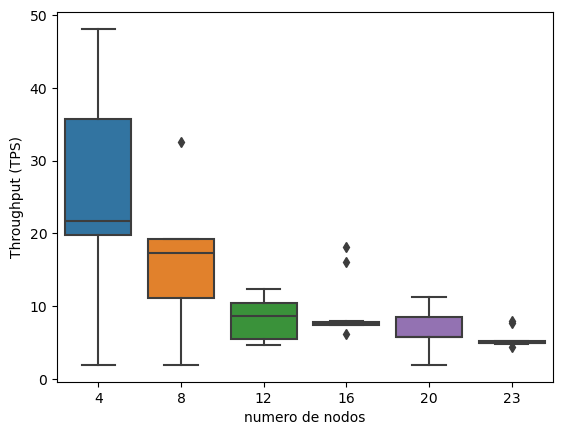

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_tables(url):
    # Read HTML tables into a list of DataFrame objects.
    tables = pd.read_html(url)

    for i, table in enumerate(tables):
        print(f"Table {i}")
        print(table)
        print("\n" * 2)
        
def extract_table(url, index):
    # lee la tabla selecionada
    #primero se extrae una lista con la tablas en formato dataframe
    tables = pd.read_html(url)
    #se esxrae la tabla indicando su indice
    table= tables[index]
    #retorna la tabla
    return table

def concatenar_tablas (ruta, numero_reportes):
    #se extrae la primera tabla de la ruta selecciona para determinar las columnas
    primera_tabla = extract_table((ruta+f'/report-1.html'),1)
    print(primera_tabla) 
    #se crea una tabla vacia con los nombres de las columnas
    tabla_concatenada = primera_tabla.iloc[0:0]  # Inicializar tabla_concatenada con las mismas columnas que primera_tabla
    for i in range(1, numero_reportes+1):
        #itera ñadiendo una fila por cada documento
        tabla = extract_table((ruta+f'/report-{i}.html'),1) 
        #añade informacion de la ronda a la tabla concatenada
        tabla['round'] = i
        tabla_concatenada = pd.concat([tabla_concatenada, tabla], ignore_index=True)
    #retorna la tabla con los datos de todas las rondas    
    return tabla_concatenada

def generar_tabla_comparativa_por_nodos (ruta, numero_reportes, n_muestras, tps_entrada, lista_n_nodos) :
    #esta funcion recibe como entrada la ruta de los reportes, el numero de reportes, el numero de muestras y la lista con
    #el numero de nodos.
    #la estructura de las carpetas debe seguir el siguiente ejemplo
    #-ruta/
    # --resultados-4-nodos/
    # ---100-tps-100-muestras                         -
    #--resultados-{n_nodos}-nodos/
    #---{tps_entrada}-tps-{n_muestras}-muestras
    
    # Generar tabla comparativa con las filas seleccionadas.
    tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])
    for n_nodos in lista_n_nodos:
        #genera la ruta al test con el numero de nodos y los tps indicados.
        ruta_final = ruta+'/resultados-'+n_nodos+f'-nodos/{tps_entrada}-tps-{n_muestras}-muestras'
        # Concatena las tablas
        tabla_concatenada = concatenar_tablas(ruta_final, numer_reportes)
        #Extrae los datos numericos de la tabla concatenada
        tablas_concatenada_numerica = tabla_concatenada.select_dtypes(include=['number'])
        #se extrae la suma de las columnas y el promedio a las series
        mean = tablas_numericas.mean()
        sum = tablas_numericas.sum()
        # Agregar una fila a la tabla comparativa con las estadísticas calculadas
        tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
    # retorna la tabla con los pormedios de todas los test para los diferentes numeros de nodos    
    return tabla_comparativa

def add_column_nodos(tabla, num_nodos):
    # Add a new column 'numero de nodos' with the specified number of nodes
    tabla['numero de nodos'] = num_nodos
    return tabla



# Concatenar las tablas
tablas_4_nodos_200_muestras = concatenar_tablas('reportes/resultados-4-nodos/75-tps-200-muestras', 10)
tablas_4_nodos_200_muestras = add_column_nodos(tablas_4_nodos_200_muestras, 4)
tablas_8_nodos_200_muestras = concatenar_tablas('reportes/resultados-8-nodos/75-tps-200-muestras', 10)
tablas_8_nodos_200_muestras = add_column_nodos(tablas_8_nodos_200_muestras, 8)
tablas_12_nodos_200_muestras = concatenar_tablas('reportes/resultados-12-nodos/75-tps-200-muestras', 10)
tablas_12_nodos_200_muestras = add_column_nodos(tablas_12_nodos_200_muestras, 12)
tablas_16_nodos_200_muestras = concatenar_tablas('reportes/resultados-16-nodos/75-tps-200-muestras', 10)
tablas_16_nodos_200_muestras = add_column_nodos(tablas_16_nodos_200_muestras, 16)
tablas_20_nodos_200_muestras = concatenar_tablas('reportes/resultados-20-nodos/75-tps-200-muestras', 10)
tablas_20_nodos_200_muestras = add_column_nodos(tablas_20_nodos_200_muestras, 20)
tablas_23_nodos_200_muestras = concatenar_tablas('reportes/resultados-23-nodos/75-tps-200-muestras', 10)
tablas_23_nodos_200_muestras = add_column_nodos(tablas_23_nodos_200_muestras, 23)
# Se concatenan las tablas
tablas = pd.concat([tablas_4_nodos_200_muestras, tablas_8_nodos_200_muestras, tablas_12_nodos_200_muestras, tablas_16_nodos_200_muestras, tablas_20_nodos_200_muestras, tablas_23_nodos_200_muestras], ignore_index=True)

print(tablas)

# Add a boxplot
sns.boxplot(x='numero de nodos', y='Throughput (TPS)', data=tablas)
plt.show()



              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             50.3            10.21   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.46             8.32              18.5  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             50.3            18.19   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.29             14.1              10.6  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             50.3            31.22   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.28            20.07               6.0  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             50.3            42.78   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.46            20.57               4.4  
    

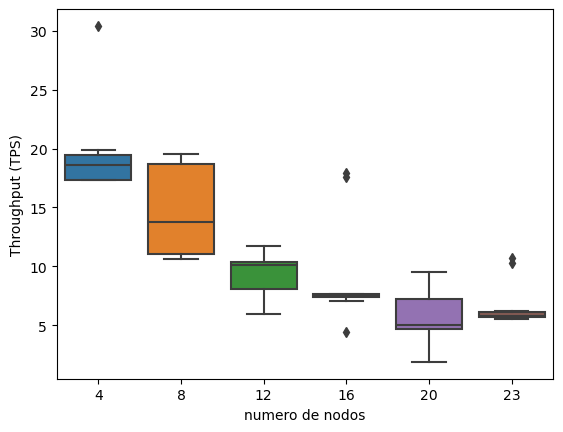

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_tables(url):
    # Read HTML tables into a list of DataFrame objects.
    tables = pd.read_html(url)

    for i, table in enumerate(tables):
        print(f"Table {i}")
        print(table)
        print("\n" * 2)
        
def extract_table(url, index):
    # lee la tabla selecionada
    #primero se extrae una lista con la tablas en formato dataframe
    tables = pd.read_html(url)
    #se esxrae la tabla indicando su indice
    table= tables[index]
    #retorna la tabla
    return table

def concatenar_tablas (ruta, numero_reportes):
    #se extrae la primera tabla de la ruta selecciona para determinar las columnas
    primera_tabla = extract_table((ruta+f'/report-1.html'),1)
    print(primera_tabla) 
    #se crea una tabla vacia con los nombres de las columnas
    tabla_concatenada = primera_tabla.iloc[0:0]  # Inicializar tabla_concatenada con las mismas columnas que primera_tabla
    for i in range(1, numero_reportes+1):
        #itera ñadiendo una fila por cada documento
        tabla = extract_table((ruta+f'/report-{i}.html'),1) 
        #añade informacion de la ronda a la tabla concatenada
        tabla['round'] = i
        tabla_concatenada = pd.concat([tabla_concatenada, tabla], ignore_index=True)
    #retorna la tabla con los datos de todas las rondas    
    return tabla_concatenada

def generar_tabla_comparativa_por_nodos (ruta, numero_reportes, n_muestras, tps_entrada, lista_n_nodos) :
    #esta funcion recibe como entrada la ruta de los reportes, el numero de reportes, el numero de muestras y la lista con
    #el numero de nodos.
    #la estructura de las carpetas debe seguir el siguiente ejemplo
    #-ruta/
    # --resultados-4-nodos/
    # ---100-tps-100-muestras                         -
    #--resultados-{n_nodos}-nodos/
    #---{tps_entrada}-tps-{n_muestras}-muestras
    
    # Generar tabla comparativa con las filas seleccionadas.
    tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])
    for n_nodos in lista_n_nodos:
        #genera la ruta al test con el numero de nodos y los tps indicados.
        ruta_final = ruta+'/resultados-'+n_nodos+f'-nodos/{tps_entrada}-tps-{n_muestras}-muestras'
        # Concatena las tablas
        tabla_concatenada = concatenar_tablas(ruta_final, numer_reportes)
        #Extrae los datos numericos de la tabla concatenada
        tablas_concatenada_numerica = tabla_concatenada.select_dtypes(include=['number'])
        #se extrae la suma de las columnas y el promedio a las series
        mean = tablas_numericas.mean()
        sum = tablas_numericas.sum()
        # Agregar una fila a la tabla comparativa con las estadísticas calculadas
        tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
    # retorna la tabla con los pormedios de todas los test para los diferentes numeros de nodos    
    return tabla_comparativa
111
def add_column_nodos(tabla, num_nodos):
    # Add a new column 'numero de nodos' with the specified number of nodes
    tabla['numero de nodos'] = num_nodos
    return tabla



# Concatenar las tablas
tablas_4_nodos_200_muestras = concatenar_tablas('reportes/resultados-4-nodos/50-tps-200-muestras', 10)
tablas_4_nodos_200_muestras = add_column_nodos(tablas_4_nodos_200_muestras, 4)
tablas_8_nodos_200_muestras = concatenar_tablas('reportes/resultados-8-nodos/50-tps-200-muestras', 10)
tablas_8_nodos_200_muestras = add_column_nodos(tablas_8_nodos_200_muestras, 8)
tablas_12_nodos_200_muestras = concatenar_tablas('reportes/resultados-12-nodos/50-tps-200-muestras', 10)
tablas_12_nodos_200_muestras = add_column_nodos(tablas_12_nodos_200_muestras, 12)
tablas_16_nodos_200_muestras = concatenar_tablas('reportes/resultados-16-nodos/50-tps-200-muestras', 10)
tablas_16_nodos_200_muestras = add_column_nodos(tablas_16_nodos_200_muestras, 16)
tablas_20_nodos_200_muestras = concatenar_tablas('reportes/resultados-23-nodos/50-tps-200-muestras', 10)
tablas_20_nodos_200_muestras = add_column_nodos(tablas_20_nodos_200_muestras, 20)
tablas_23_nodos_200_muestras = concatenar_tablas('reportes/resultados-20-nodos/50-tps-200-muestras', 10)
tablas_23_nodos_200_muestras = add_column_nodos(tablas_23_nodos_200_muestras, 23)
# Se concatenan las tablas
tablas = pd.concat([tablas_4_nodos_200_muestras, tablas_8_nodos_200_muestras, tablas_12_nodos_200_muestras, tablas_16_nodos_200_muestras, tablas_20_nodos_200_muestras, tablas_23_nodos_200_muestras], ignore_index=True)

print(tablas)

# Add a boxplot
sns.boxplot(x='numero de nodos', y='Throughput (TPS)', data=tablas)
plt.show()



              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             20.1             8.55   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             0.71              4.4              14.4  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             20.1            16.35   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             0.76              5.4               8.0  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   197     3             20.1            27.92   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.06            18.81               1.8  
              Name  Succ  Fail  Send Rate (TPS)  Max Latency (s)  \
0  añadir_paciente   200     0             20.1             8.67   

   Min Latency (s)  Avg Latency (s)  Throughput (TPS)  
0             1.11             4.48              15.0  
    

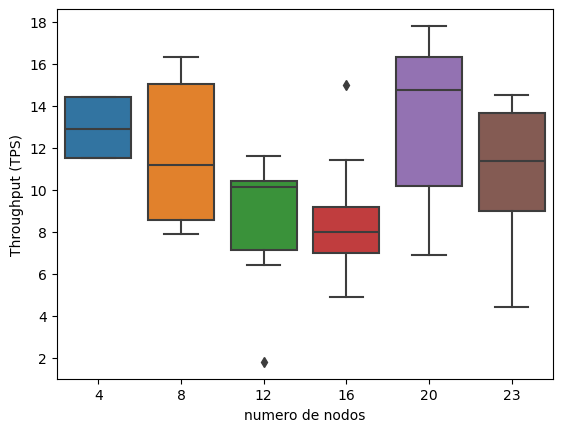

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_tables(url):
    # Read HTML tables into a list of DataFrame objects.
    tables = pd.read_html(url)

    for i, table in enumerate(tables):
        print(f"Table {i}")
        print(table)
        print("\n" * 2)
        
def extract_table(url, index):
    # lee la tabla selecionada
    #primero se extrae una lista con la tablas en formato dataframe
    tables = pd.read_html(url)
    #se esxrae la tabla indicando su indice
    table= tables[index]
    #retorna la tabla
    return table

def concatenar_tablas (ruta, numero_reportes):
    #se extrae la primera tabla de la ruta selecciona para determinar las columnas
    primera_tabla = extract_table((ruta+f'/report-1.html'),1)
    print(primera_tabla) 
    #se crea una tabla vacia con los nombres de las columnas
    tabla_concatenada = primera_tabla.iloc[0:0]  # Inicializar tabla_concatenada con las mismas columnas que primera_tabla
    for i in range(1, numero_reportes+1):
        #itera ñadiendo una fila por cada documento
        tabla = extract_table((ruta+f'/report-{i}.html'),1) 
        #añade informacion de la ronda a la tabla concatenada
        tabla['round'] = i
        tabla_concatenada = pd.concat([tabla_concatenada, tabla], ignore_index=True)
    #retorna la tabla con los datos de todas las rondas    
    return tabla_concatenada

def generar_tabla_comparativa_por_nodos (ruta, numero_reportes, n_muestras, tps_entrada, lista_n_nodos) :
    #esta funcion recibe como entrada la ruta de los reportes, el numero de reportes, el numero de muestras y la lista con
    #el numero de nodos.
    #la estructura de las carpetas debe seguir el siguiente ejemplo
    #-ruta/
    # --resultados-4-nodos/
    # ---100-tps-100-muestras                         -
    #--resultados-{n_nodos}-nodos/
    #---{tps_entrada}-tps-{n_muestras}-muestras
    
    # Generar tabla comparativa con las filas seleccionadas.
    tabla_comparativa = pd.DataFrame(columns=['numero de nodos', 'TPS entrada', 'TPS salida'])
    for n_nodos in lista_n_nodos:
        #genera la ruta al test con el numero de nodos y los tps indicados.
        ruta_final = ruta+'/resultados-'+n_nodos+f'-nodos/{tps_entrada}-tps-{n_muestras}-muestras'
        # Concatena las tablas
        tabla_concatenada = concatenar_tablas(ruta_final, numer_reportes)
        #Extrae los datos numericos de la tabla concatenada
        tablas_concatenada_numerica = tabla_concatenada.select_dtypes(include=['number'])
        #se extrae la suma de las columnas y el promedio a las series
        mean = tablas_numericas.mean()
        sum = tablas_numericas.sum()
        # Agregar una fila a la tabla comparativa con las estadísticas calculadas
        tabla_comparativa.loc[len(tabla_comparativa)] = [4, mean['Send Rate (TPS)'], mean['Throughput (TPS)']]
    # retorna la tabla con los pormedios de todas los test para los diferentes numeros de nodos    
    return tabla_comparativa
111
def add_column_nodos(tabla, num_nodos):
    # Add a new column 'numero de nodos' with the specified number of nodes
    tabla['numero de nodos'] = num_nodos
    return tabla



# Concatenar las tablas
tablas_4_nodos_200_muestras = concatenar_tablas('reportes/resultados-4-nodos/20-tps-200-muestras', 10)
tablas_4_nodos_200_muestras = add_column_nodos(tablas_4_nodos_200_muestras, 4)
tablas_8_nodos_200_muestras = concatenar_tablas('reportes/resultados-8-nodos/20-tps-200-muestras', 10)
tablas_8_nodos_200_muestras = add_column_nodos(tablas_8_nodos_200_muestras, 8)
tablas_12_nodos_200_muestras = concatenar_tablas('reportes/resultados-12-nodos/20-tps-200-muestras', 10)
tablas_12_nodos_200_muestras = add_column_nodos(tablas_12_nodos_200_muestras, 12)
tablas_16_nodos_200_muestras = concatenar_tablas('reportes/resultados-16-nodos/20-tps-200-muestras', 10)
tablas_16_nodos_200_muestras = add_column_nodos(tablas_16_nodos_200_muestras, 16)
tablas_20_nodos_200_muestras = concatenar_tablas('reportes/resultados-23-nodos/20-tps-200-muestras', 10)
tablas_20_nodos_200_muestras = add_column_nodos(tablas_20_nodos_200_muestras, 20)
tablas_23_nodos_200_muestras = concatenar_tablas('reportes/resultados-20-nodos/20-tps-200-muestras', 10)
tablas_23_nodos_200_muestras = add_column_nodos(tablas_23_nodos_200_muestras, 23)
# Se concatenan las tablas
tablas = pd.concat([tablas_4_nodos_200_muestras, tablas_8_nodos_200_muestras, tablas_12_nodos_200_muestras, tablas_16_nodos_200_muestras, tablas_20_nodos_200_muestras, tablas_23_nodos_200_muestras], ignore_index=True)

print(tablas)

# Add a boxplot
sns.boxplot(x='numero de nodos', y='Throughput (TPS)', data=tablas)
plt.show()

